<font size=+4><b>TP CNN</b></font>

Diane LINGRAND 

diane.lingrand@univ-cotedazur.fr   


Polytech - SI4 - 2024-2025

In [1]:
import torch

import random
import numpy as np
import xml.etree.ElementTree as ET
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from tqdm import tqdm

import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, GlobalAveragePooling2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, f1_score, ConfusionMatrixDisplay
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# Dataset

In this lab we will use a subset of the well-know <a href="http://host.robots.ox.ac.uk/pascal/VOC/voc2012/">Pascal VOC 2012</a> dataset. We have chosen the images that contain only one object from the 20 initial classes and selected the 3 most important classes: cat, dog and bird.
You can download <a href="https://unice-my.sharepoint.com/:u:/g/personal/diane_lingrand_unice_fr/EfF1QoAwABtIhmR2cJKtybABTFXKgCp3Gl-Yt7Z5wVG1oA?e=Tt7Ijl">here</a>, using your UniCA account, the reduced dataset and decompress the archive on your hard disk (or google drive if you are working on google colab). Note the where you decompress the archive and set the corresponding variable:

In [3]:
homedir = 'C:\\Users\\Admin\\Master Program\\Introduction to Deep Learning\\Labs\\CatDogBird\\'
#homedir='/content/drive/My Drive/CatDogBird/'

Look at the files in the 'CatDogBird' directory. For each xml file, there is a corresponding jpg file. Inside the xml file, different informations are available. In this lab we will focus only on the class name.

In [4]:
classesNames=['cat','dog','bird']
nbClasses = len(classesNames)

listXml = glob.glob(homedir+'*.xml')
listImgFiles=[]
listLabels=[]

for xml in listXml:
    for d in ET.parse(xml).getroot().findall('.//object/name'):
        if d.text=='cat':
            listLabels.append(0)
            listImgFiles.append(xml[:-4]+'.jpg')
        elif d.text=='dog':
            listLabels.append(1)
            listImgFiles.append(xml[:-4]+'.jpg')
        elif d.text=='bird':
            listLabels.append(2)
            listImgFiles.append(xml[:-4]+'.jpg')

In [5]:
nbClasses

3

Let's have a look to a random image!

(-0.5, 499.5, 374.5, -0.5)

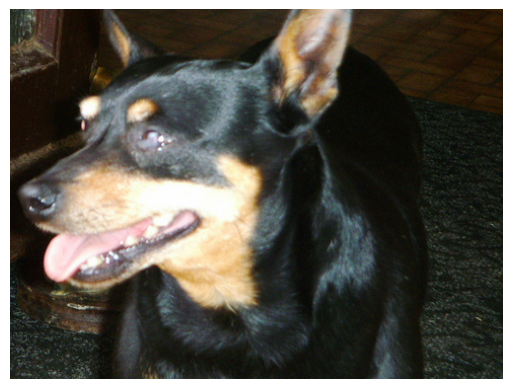

In [6]:
index = random.randint(0,len(listImgFiles))
img = plt.imread(listImgFiles[index])
plt.imshow(img)
plt.axis('off')

<font color="green"><b>Question:</b></font> How many samples are there in this dataset? How many samples per class? Do all images have the same dimensions? (you can answer the last question by running the previous cell multiple times)

In [7]:
# your work
from collections import Counter

print("Number of labels: ",len(listLabels))
print("Number of sample per class: ", Counter(listLabels))

Number of labels:  2007
Number of sample per class:  Counter({0: 745, 1: 694, 2: 568})


<font color="green"><b>Question:</b></font> Load the images as color images of type float32 and dimension 224 by 224 and perform the pre-processing for a VGG16 network. The resulting data tensor X should be of shape (nbOfSamples, 224, 224, 3). We give you a hint for a single filename:

In [8]:
X = []
for imageFilename in listImgFiles:
    img = image.load_img(imageFilename, target_size=(224,224))
    im = image.img_to_array(img)
    # im = np.expand_dims(im, axis=0)
    im = preprocess_input(im)
    X.append(im)

Be also aware that it is more effective to allocate the memory needed at once than adding space for each image.

In [9]:
# your work

<font color='red'>For teachers, verify this question carefully and, if needed, give the correction of this cell to the student.</font>

<font color="green"><b>Question:</b></font> Split into train/test. Set a fixed seed so that you will be able to split the same way for another run. For example, if you want to modify the CNN, you will have to redo the pre-processing and build another X data. Convert the integer labels to categorical labels.

In [10]:
# your work
X_train, X_test, y_train, y_test = train_test_split(np.array(X), np.array(listLabels), test_size=0.2, shuffle=True, random_state=1)

# Transform the integer labels to categorical labels
yTrainCat = to_categorical(y_train)
yTestCat = to_categorical(y_test)
xTrain = X_train.copy()
xTest = X_test.copy()

<font color="green"><b>Question:</b></font> What are the shapes for xTrain and xTest? For train and test, how many samples per class? Are the classes balanced?

In [11]:
# your work
xTrain.shape
Counter(y_train)

Counter({0: 591, 1: 555, 2: 459})

<font color="green"><b>Question:</b></font> Compute the accuracy of 2 classifers:
<ul><li>classification always to the majority class</li>
<li>random classification (uniform law)</li></ul>

In [12]:
# your work
# logistic_model = LogisticRegression(penalty='l2', solver='saga')

# Build your own CNN network

Start with the simplest CNN: 1 conv2D layer + 1 pooling + 1 dense layer.

In [13]:
model = Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(16,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=2, padding='same'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=2, padding='same'))
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=2, padding='same'))
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(4, 4), strides=2, padding='same'))
model.add(Flatten())
model.add(Dense(nbClasses, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

KeyboardInterrupt: 

<font color="green"><b>Question:</b></font> Let's look at the dimension of all inputs and outputs! How many parameters will you have to learn? In which part of the network are most of the parameters?

In [ ]:
# your work
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 172,707 (674.64 KB)

 Trainable params: 172,707 (674.64 KB)

 Non-trainable params: 0 (0.00 B)

<font color="green"><b>Question:</b></font> Learn and test this network. 

In [ ]:
# your work
# Early stopping
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, mode='min')

# Fit with the training data and validation data
history = model.fit(xTrain, yTrainCat, epochs=20, validation_split=0.2)

Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 14s 296ms/step - accuracy: 0.3202 - loss: 62.7288 - val_accuracy: 0.4330 - val_loss: 1.0477
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 276ms/step - accuracy: 0.4522 - loss: 1.0405 - val_accuracy: 0.4517 - val_loss: 1.0192
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.4998 - loss: 0.9642 - val_accuracy: 0.4330 - val_loss: 0.9947
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.5226 - loss: 0.9676 - val_accuracy: 0.4517 - val_loss: 1.0395
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 265ms/step - accuracy: 0.5410 - loss: 0.8986 - val_accuracy: 0.4330 - val_loss: 1.0654
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.5509 - loss: 0.9214 - val_accuracy: 0.4673 - val_loss: 1.0904
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5962 - loss: 0.8434 - val_accuracy: 0.4673 - val_loss: 1.0284
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 262ms/step - accuracy: 0.5968 - loss: 0.8304 - val_acc

<font color="green"><b>Question:</b></font> Are you satisfied by the performances?
Try to modify the architecture (add layers) and some of the hyper-parameters. For some of the architectures, learning will be difficult. If you are stucked with the learning, try the next paragraphs about Dropout and Batch Normalisation.

In [ ]:
# your work

## About Dropout 

*Study this part only if you have time for it. It concerns the previous network but prefer to study first part II and come back here after.*

Simply put, dropout refers to ignoring units (i.e. neurons) during the training phase of certain set of neurons which is chosen at random. By “ignoring”, I mean these units are not considered during a particular forward or backward pass.

Why use dropout ? A fully connected layer occupies most of the parameters, and hence, neurons develop co-dependency amongst each other during training which curbs the individual power of each neuron leading to overfitting of training data.

**Let's add dropout and activation functions to the network!**

In [ ]:
# HERE IS AN EXAMPLE OF CODE, NOT A GOOD NETWORK FOR YOUR PROBLEM
from keras.layers import Dropout

model = Sequential(name='small CNN model with dropout') 

model = Sequential()
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(GlobalAveragePooling2D())
model.add(Dense(200,activation='relu'))
# adding dropout to the previous layer
model.add(Dropout(0.2))

model.add(Dense(nbClasses, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

We suggest to add dropout layers before layers with many parameters to be learned.

In [ ]:
model.summary()

## Batch normalisation

Implementation using keras <a href="https://keras.io/api/layers/normalization_layers/batch_normalization/">BatchNormalization</a> class.

In [ ]:
model.add(BatchNormalization())

# Using a pre-learned network

## loading VGG-16 description part and adding layers to build our own classification network

In [ ]:
VGGmodel = VGG16(weights='imagenet', include_top=False)
VGGmodel.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# we will add layers to this feature extraction part of VGG network
m = VGGmodel.output
# we start with a global average pooling
m = GlobalAveragePooling2D()(m)
# add batch-normalization
m = BatchNormalization()(m)
# and add a fully-connected layer
m = Dense(1024, activation='relu')(m)
# finally, the softmax layer for predictions (we have nbClasses classes)
m = Dropout(0.2)(m)

predictions = Dense(nbClasses, activation='softmax')(m)

# global network
model = Model(inputs=VGGmodel.input, outputs=predictions)


<font color="green"><b>Question:</b></font>  Can you display the architecture of this entire network?

In [ ]:
# your work
model.summary()

Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 15,245,123 (58.16 MB)

 Trainable params: 15,244,099 (58.15 MB)

 Non-trainable params: 1,024 (4.00 KB)

<font color="green"><b>Question:</b></font> Train and evaluate this network

In [ ]:
# training part I: training only the classification part (the end)
for layer in VGGmodel.layers:
    layer.trainable = False

# your work here
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xTrain, yTrainCat, epochs=20, validation_split=0.2)

Epoch 1/20
 3/41 ━━━━━━━━━━━━━━━━━━━━ 2:02 3s/step - accuracy: 0.9878 - loss: 0.0574

KeyboardInterrupt: 

<font color="green"><b>Question:</b></font> When your network is good enough, find the index of wrongly classified images and display them.

In [ ]:
# your work

### fine-tune the network

Fine-tune the entire network if you have enough computing ressouces, otherwise, carefully choose the layers you want to fine-tune.

In [ ]:
for i, layer in enumerate(VGGmodel.layers):
   print(i, layer.name)
model.summary()

0 input_layer_7
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, None, None, 64) │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, None, None, 64) │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, None, None, 64) │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, None, None,     │        73,856 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, None, None,     │       147,584 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 128)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, None, None,     │       295,168 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, None, None,     │       590,080 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 256)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, None, None,     │     1,180,160 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, None, None,     │             0 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, None, None,     │     2,359,808 │
│                                 │ 512)                   │             

 Total params: 16,303,947 (62.19 MB)

 Trainable params: 529,411 (2.02 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

 Optimizer params: 1,058,824 (4.04 MB)

In this example, we will fine-tune the last convolution block starting at layer number 15 (block5_conv).

In [ ]:
from keras.optimizers import RMSprop
for layer in model.layers[:15]:
   layer.trainable = False
for layer in model.layers[15:]:
   layer.trainable = True
#need to recompile the network
model.compile(optimizer=RMSprop(learning_rate=0.0001), loss='categorical_crossentropy',metrics=['accuracy'])
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])
#and train again ...
ourCallback = keras.callbacks.EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=20, verbose=0, mode='auto', baseline=None, restore_best_weights=True)
 
model.fit(xTrain, yTrainCat, epochs=10, batch_size=16, validation_split=0.2, callbacks=[ourCallback],verbose=1)

Epoch 1/10
 6/81 ━━━━━━━━━━━━━━━━━━━━ 2:30 2s/step - accuracy: 0.9656 - loss: 0.1055

KeyboardInterrupt: 

In [ ]:
#enter here your code for evaluation of performances